In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load cleaned dataset
df = pd.read_csv("cleaned_concrete_dataset.csv")

# Step 2: Define features (X) and target (y)
X = df[["Cement", "Sand", "Aggregate", "water_in_liter", "Total Weight"]]
y = df["rotation_count"]

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = model.predict(X_test)

# Step 6: Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Display results
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Model Coefficients:
Cement: 1.2206
Sand: 1.8309
Aggregate: 3.6619
water_in_liter: 0.6713
Total Weight: 7.3848

Intercept: 0.0000
Mean Squared Error: 0.0000
R^2 Score: 1.0000


In [74]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:/Users/Karan Singh/Documents/Quantum Integrators Data/Pandas/cleaned_concrete_dataset.csv')
print(df)

     Cement    Sand  Aggregate  water_in_liter  Total Weight  time_in_minutes  \
0       1.0    1.50        3.0           0.550         6.050            2.550   
1       1.5    2.25        4.5           0.825         9.075            3.825   
2       2.0    3.00        6.0           1.100        12.100            5.100   
3       2.5    3.75        7.5           1.375        15.125            6.375   
4       3.0    4.50        9.0           1.650        18.150            7.650   
..      ...     ...        ...             ...           ...              ...   
213   107.5  161.25      322.5          59.125       650.375          274.125   
214   108.0  162.00      324.0          59.400       653.400          275.400   
215   108.5  162.75      325.5          59.675       656.425          276.675   
216   109.0  163.50      327.0          59.950       659.450          277.950   
217   109.5  164.25      328.5          60.225       662.475          279.225   

     rotation_count  
0    

In [75]:
x = df[["Cement", "Sand", "Aggregate", "water_in_liter"]]
y = df["rotation_count"]

In [76]:
x

,Cement,Sand,Aggregate,water_in_liter
0,1.0,1.50,3.0,0.550
1,1.5,2.25,4.5,0.825
2,2.0,3.00,6.0,1.100
3,2.5,3.75,7.5,1.375
4,3.0,4.50,9.0,1.650
...,...,...,...,...
213,107.5,161.25,322.5,59.125
214,108.0,162.00,324.0,59.400
215,108.5,162.75,325.5,59.675
216,109.0,163.50,327.0,59.950


In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape, X_test.shape

((174, 4), (44, 4))

Model Training

In [56]:
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [79]:
lr_model.intercept_

0.0

In [80]:
y_pred = lr_model.predict(X_test)
y_pred

array([3060., 6510., 4230., 5400.,  510., 4680., 5160., 2250., 6270.,
       4260., 5730.,  960., 6390.,  330., 2070., 5370., 5250.,  600.,
       4710., 2040., 5820., 4350., 2430.,  810., 3450., 4470., 5340.,
        540., 1410., 4620., 3330., 1710., 6450., 5880., 3300., 4920.,
       2310., 4140., 3630., 6150., 2940., 5610., 3600., 2850.])

In [81]:
residual_test= y_test - y_pred
residual_test

100   -4.547474e-13
215   -9.094947e-13
139   -9.094947e-13
178    0.000000e+00
15    -5.684342e-14
154    0.000000e+00
170    0.000000e+00
73     0.000000e+00
207   -9.094947e-13
140   -9.094947e-13
189   -9.094947e-13
30    -1.136868e-13
211   -9.094947e-13
9      0.000000e+00
67    -4.547474e-13
177   -9.094947e-13
173   -9.094947e-13
18     0.000000e+00
155    0.000000e+00
66    -2.273737e-13
192    0.000000e+00
143    0.000000e+00
79     0.000000e+00
25    -1.136868e-13
113   -4.547474e-13
147   -9.094947e-13
176    0.000000e+00
16    -1.136868e-13
45     0.000000e+00
152    0.000000e+00
109   -4.547474e-13
55    -2.273737e-13
213   -9.094947e-13
194    0.000000e+00
108   -4.547474e-13
162    0.000000e+00
75     0.000000e+00
136   -9.094947e-13
119   -4.547474e-13
203   -9.094947e-13
96     0.000000e+00
185   -9.094947e-13
118   -4.547474e-13
93     0.000000e+00
Name: rotation_count, dtype: float64

In [82]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([2580., 2910., 3390., 3810., 2640., 4980., 3180., 1200.,  780.,
       5070., 6300.,  930.,  630., 2130., 2970., 1860., 2100.,  210.,
       4170., 1740., 3090., 4020., 2520., 2010., 4200., 5580.,  990.,
        420., 1110.,  900., 1320., 4890., 3420., 4500., 1590., 3720.,
       5310., 2340., 1290., 6090., 2400., 3900.,  840., 4380., 3660.,
       3840.,  120., 2370., 1440., 4650., 6180., 2760., 2610., 4440.,
       3000., 1140., 4110., 1890.,  720., 4320., 3510., 1050.,  390.,
       6420., 5220.,  240.,  870., 5490., 6330., 6030.,  180., 1020.,
       3570., 5910., 3780., 4740., 3480.,  360., 1920., 3870., 4800.,
       6540.,   60., 5940., 5010., 2160., 5100., 1980., 1380., 4290.,
       1260., 3750.,  750., 4950., 4830., 2490., 1230., 5520., 1470.,
       2880., 5190., 1350., 4410., 4560.,  150., 3210., 1650., 4050.,
       5970., 5550., 6240., 1530., 2460., 1080.,  270., 3360., 2790.,
       2550., 5850., 6000., 2730.,  300.,  450., 1830., 5640., 3990.,
        570., 5040.,

In [83]:
residual_train = y_train - y_pred_train
residual_train

84     0.000000e+00
95     0.000000e+00
111   -4.547474e-13
125   -4.547474e-13
86     0.000000e+00
           ...     
106   -4.547474e-13
14    -5.684342e-14
92     0.000000e+00
179   -9.094947e-13
102    0.000000e+00
Name: rotation_count, Length: 174, dtype: float64

Assumption of Normality


<Axes: xlabel='rotation_count', ylabel='Density'>

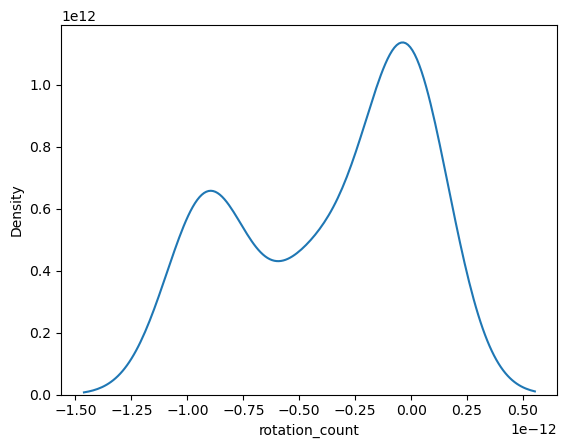

In [84]:
sns.kdeplot(residual_test)

<Axes: xlabel='rotation_count', ylabel='Density'>

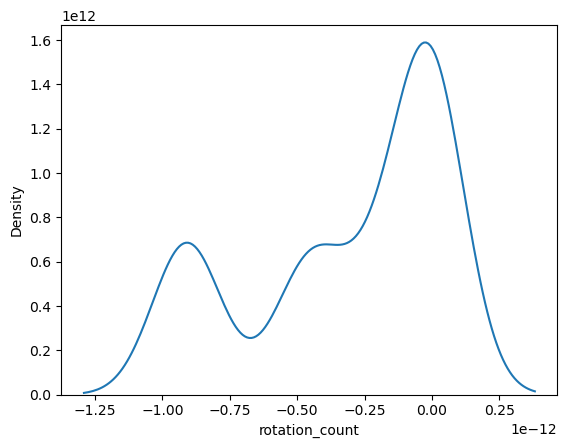

In [63]:
sns.kdeplot(residual_train)

Assumption of Homoscedasticity

we assume that we have equal variance or residuak lie withh the same range

<Axes: xlabel='rotation_count', ylabel='rotation_count'>

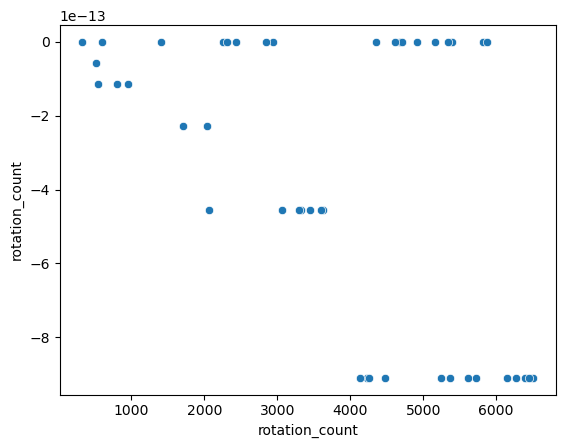

In [85]:
sns.scatterplot(x=y_test, y=residual_test)

<Axes: xlabel='rotation_count', ylabel='rotation_count'>

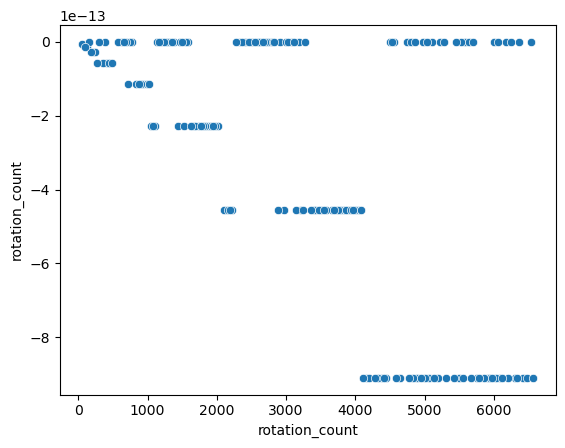

In [65]:
sns.scatterplot(x=y_train, y=residual_train)

Model Evaluation on Trainig side

In [86]:
y_pred_train = lr_model.predict(X_train)
mse=mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error on Training Set: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error on Training Set: {rmse:.4f}")
r2value = r2_score(y_train, y_pred_train)
print(f"R^2 Score on Training Set: {r2value:.4f}")

Mean Squared Error on Training Set: 0.0000
Root Mean Squared Error on Training Set: 0.0000
R^2 Score on Training Set: 1.0000


Model Evaluation On Testing side

In [87]:
# Make sure lr_model is defined by running the cell where it is trained (cell 11)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error on Test Set: {rmse:.4f}")
r2value = r2_score(y_test, y_pred)
print(f"R^2 Score on Test Set: {r2value:.4f}")

Mean Squared Error on Test Set: 0.0000
Root Mean Squared Error on Test Set: 0.0000
R^2 Score on Test Set: 1.0000


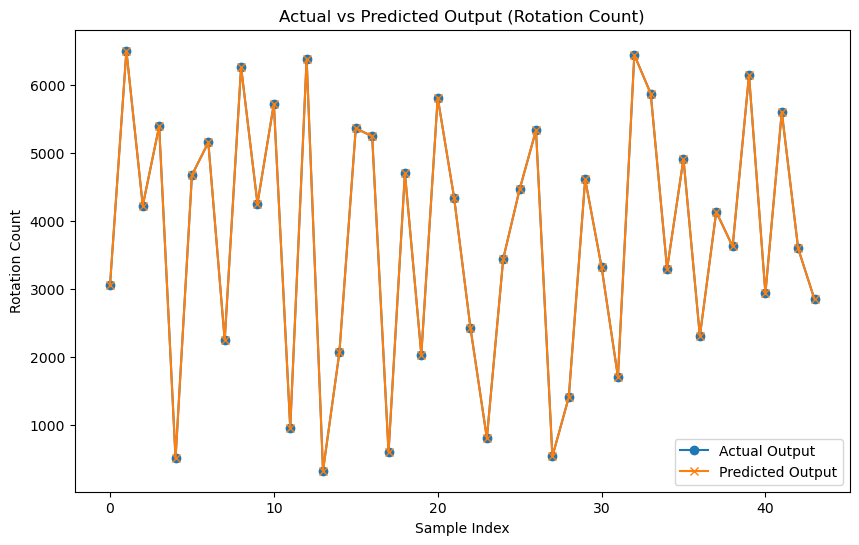

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Output', marker='o')
plt.plot(y_pred, label='Predicted Output', marker='x')
plt.title('Actual vs Predicted Output (Rotation Count)')
plt.xlabel('Sample Index')
plt.ylabel('Rotation Count')
plt.legend()
plt.show()

In [ ]:
# Answer:
# Yes, the model used here is a multiple linear regression model.
# This is evident from the use of sklearn's LinearRegression and the fact that multiple features
# (Cement, Sand, Aggregate, water_in_liter) are used as predictors (X) to predict the target (rotation_count).
# So, it is a multiple regression, not a simple regression.

print("Yes, the model is a multiple linear regression because it uses more than one feature as input.")

Text(0.5, 1.0, 'Actual vs Predicted Values')

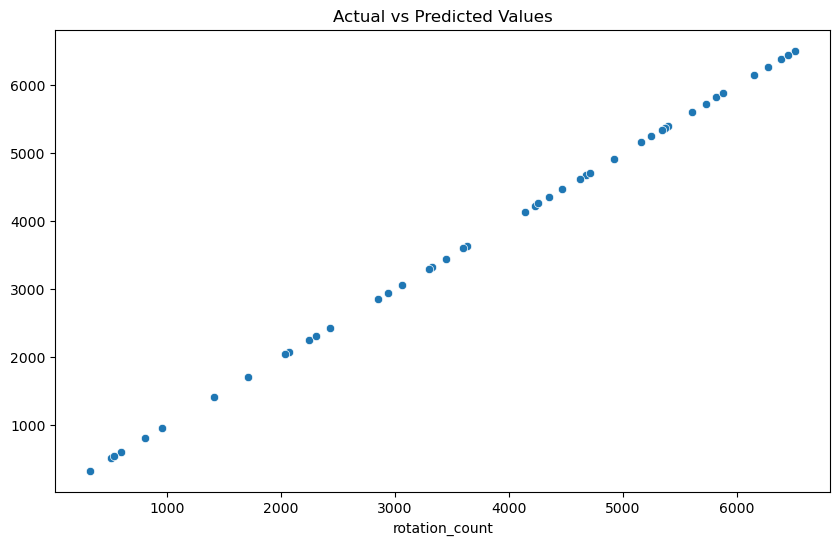

In [90]:
p=plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')

In [91]:
# User input for cement quantity (in kg)
cement_input = float(input("Enter the amount of Cement (in kg): "))

# Constants
water_cement_ratio = 0.55  # as per your example
sand_ratio = 1.5
aggregate_ratio = 3

# Calculate other quantities
sand = cement_input * sand_ratio
aggregate = cement_input * aggregate_ratio
water = cement_input * water_cement_ratio  # in liters

# Prepare input for regression model (order: Cement, Sand, Aggregate, water_in_liter)
input_features = np.array([[cement_input, sand, aggregate, water]])

# Predict rotation_count and time_in_minutes using trained model
rotation_pred = lr_model.predict(input_features)[0]

# For time_in_minutes, use the mean ratio from the dataset
time_ratio = (df['time_in_minutes'] / df['rotation_count']).mean()
time_pred = rotation_pred * time_ratio

# Calculate total weight
total_weight = cement_input + sand + aggregate + water

print(f"Cement: {cement_input:.2f} kg")
print(f"Sand: {sand:.2f} kg")
print(f"Aggregate: {aggregate:.2f} kg")
print(f"Water: {water:.2f} liters")
print(f"Total Weight: {total_weight:.2f} kg")
print(f"Predicted Rotation Count: {rotation_pred:.0f}")
print(f"Predicted Time to Stop: {time_pred:.2f} minutes")

Cement: 3.00 kg
Sand: 4.50 kg
Aggregate: 9.00 kg
Water: 1.65 liters
Total Weight: 18.15 kg
Predicted Rotation Count: 180
Predicted Time to Stop: 7.65 minutes


c:\Users\Karan Singh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
